In [1]:
# EDA.ipynb
# ---------------------------------------------
# Task 1: Exploratory Data Analysis (EDA)
# Dataset: cleaned_data_sample.csv (100k rows)
# ---------------------------------------------

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure plots
%matplotlib inline
sns.set(style='whitegrid')


In [3]:
# ---------------------------------------------
# Step 2: Load data
# ---------------------------------------------
data_file = "../data/processed/cleaned_data_sample.csv"

data = pd.read_csv(data_file)
print("Data loaded successfully!")
print(f"Shape: {data.shape}")

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/cleaned_data_sample.csv'

In [4]:
# ---------------------------------------------
# Step 3: Data overview
# ---------------------------------------------
print("\nColumns:\n", data.columns.tolist())
print("\nData Info:")
print(data.info())

# Check first few rows
data.head()

NameError: name 'data' is not defined

In [5]:
# ---------------------------------------------
# Step 4: Missing values
# ---------------------------------------------
missing = data.isnull().sum()
print("\nMissing values per column:")
print(missing[missing > 0])


NameError: name 'data' is not defined

In [6]:
# ---------------------------------------------
# Step 5: Convert numeric columns
# ---------------------------------------------
# Example numeric columns (adjust based on dataset)
numeric_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured', 'CalculatedPremiumPerTerm']

for col in numeric_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

NameError: name 'data' is not defined

In [9]:
# ---------------------------------------------
# Step 6: Descriptive statistics
# ---------------------------------------------
print("\nDescriptive statistics for numeric columns:")
print(data[numeric_cols].describe())


Descriptive statistics for numeric columns:
        TotalPremium    TotalClaims  CustomValueEstimate    SumInsured  \
count  100000.000000  100000.000000         2.192300e+04  1.000000e+05   
mean       61.236049      66.182865         2.211714e+05  6.057931e+05   
std       156.826844    2307.463156         4.488100e+05  1.507937e+06   
min      -782.576754       0.000000         2.000000e+04  1.000000e-02   
25%         0.000000       0.000000         1.350000e+05  5.000000e+03   
50%         2.144912       0.000000         2.200000e+05  7.500000e+03   
75%        21.929825       0.000000         2.801000e+05  2.513000e+05   
max      1890.948684  276248.859649         2.655000e+07  1.000000e+07   

       CalculatedPremiumPerTerm  
count             100000.000000  
mean                 117.000626  
std                  221.714033  
min                    0.000000  
25%                    3.230900  
50%                    8.420700  
75%                   90.000000  
max             

In [10]:

# ---------------------------------------------
# Step 7: Feature engineering
# ---------------------------------------------
# Loss Ratio = TotalClaims / TotalPremium
if 'TotalClaims' in data.columns and 'TotalPremium' in data.columns:
    data['LossRatio'] = data['TotalClaims'] / data['TotalPremium']
    print("\nLossRatio column added!")


LossRatio column added!


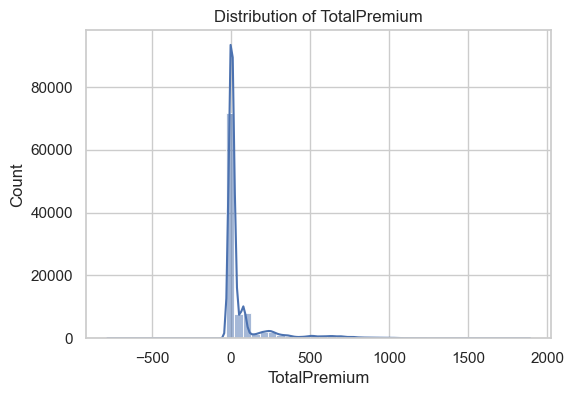

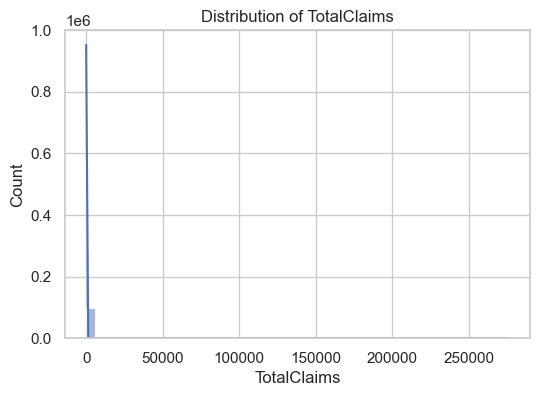

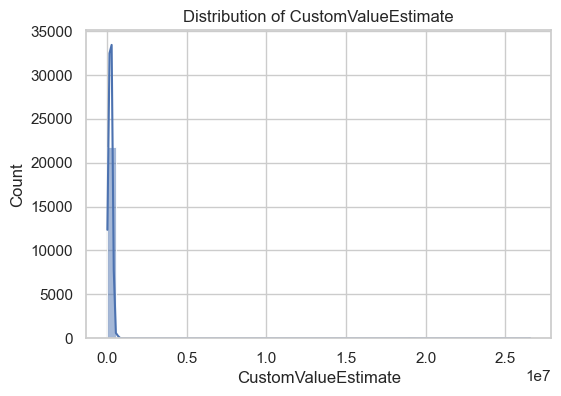

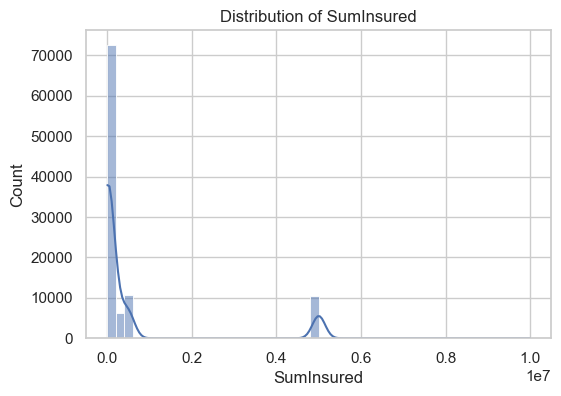

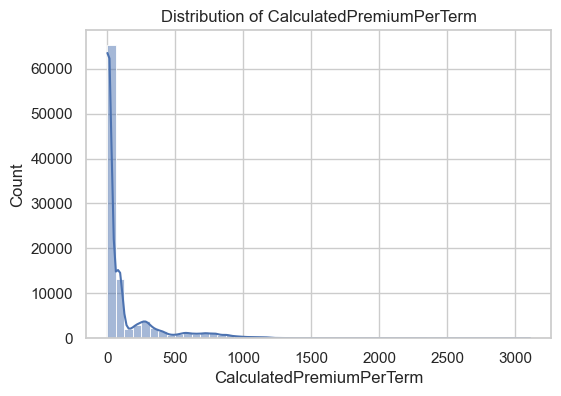

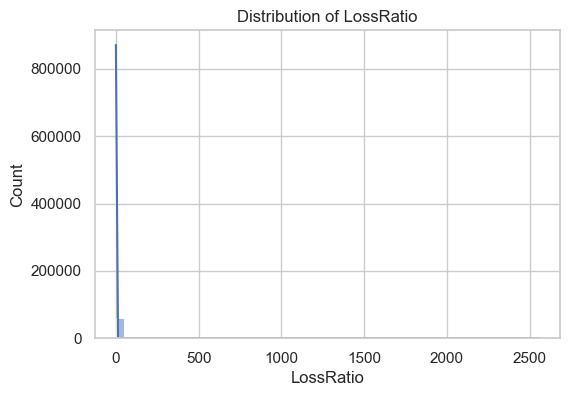

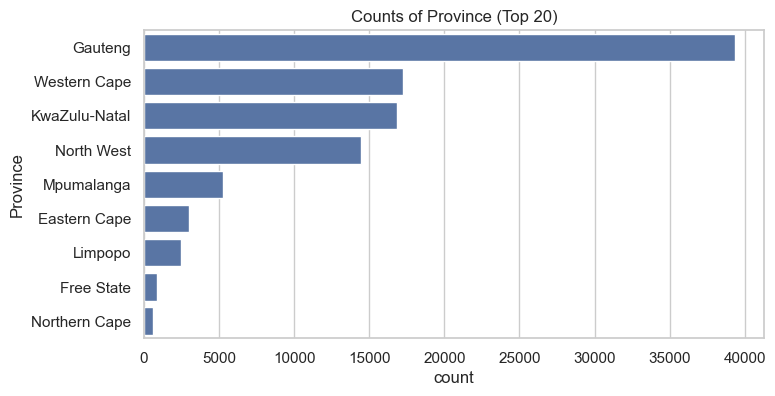

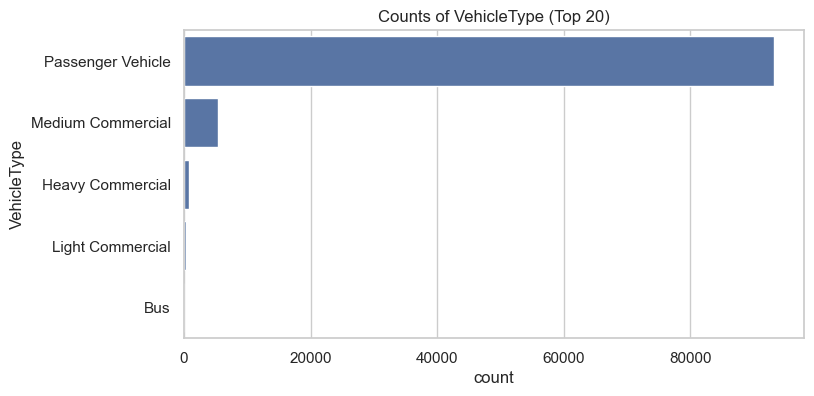

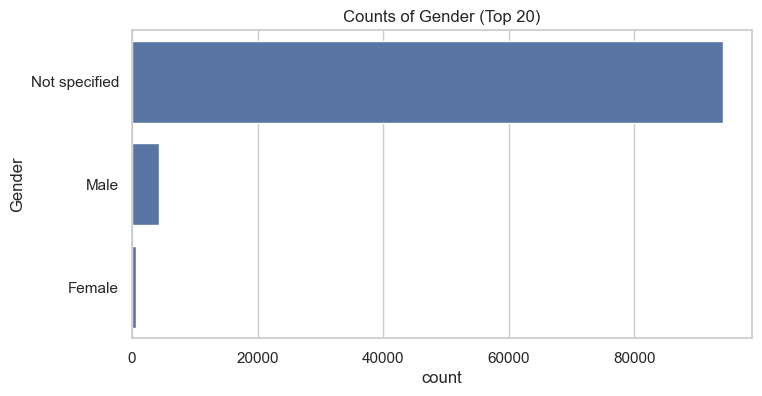

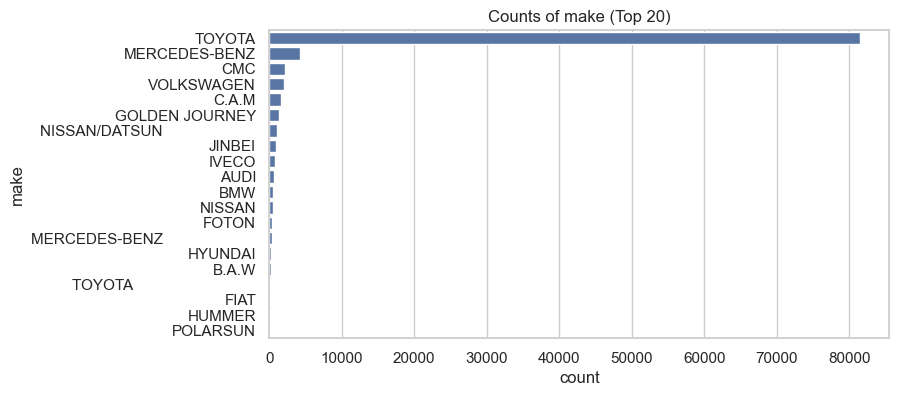

In [11]:

# ---------------------------------------------
# Step 8: Univariate analysis
# ---------------------------------------------
# Histograms for numeric variables
for col in numeric_cols + ['LossRatio']:
    if col in data.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(data[col].dropna(), bins=50, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
# Bar plots for categorical variables
categorical_cols = ['Province', 'VehicleType', 'Gender', 'make']
for col in categorical_cols:
    if col in data.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(y=col, data=data, order=data[col].value_counts().index[:20])
        plt.title(f'Counts of {col} (Top 20)')
        plt.show()


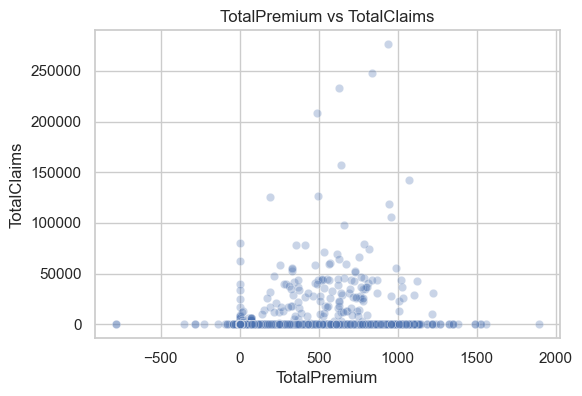

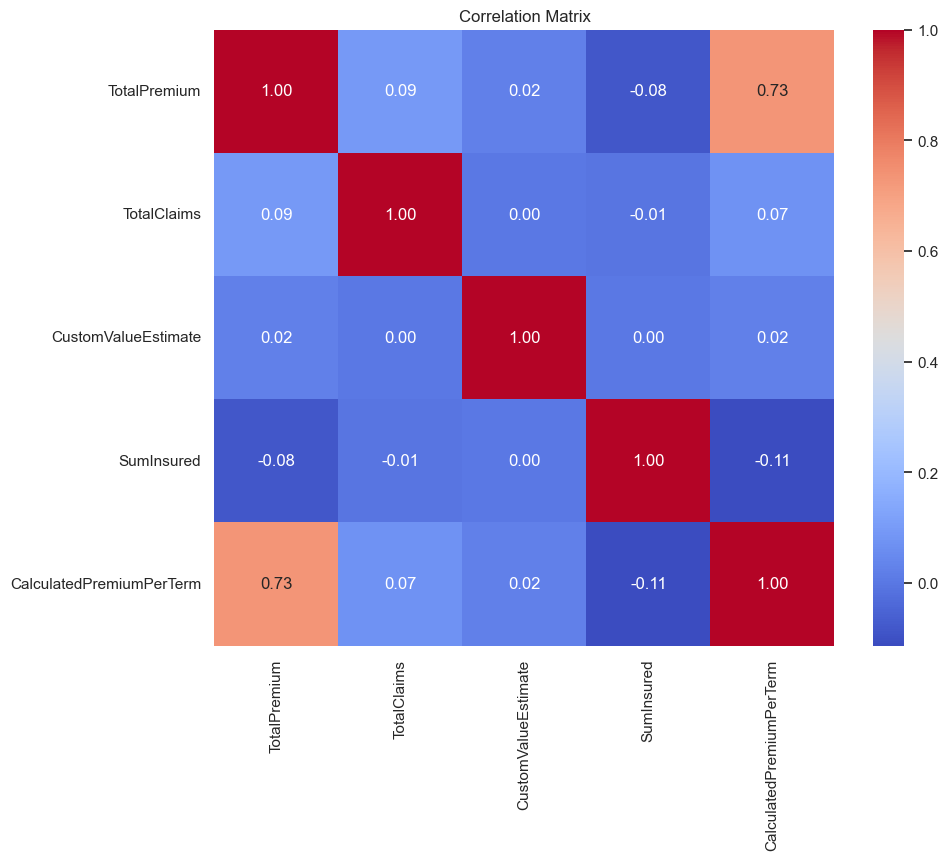

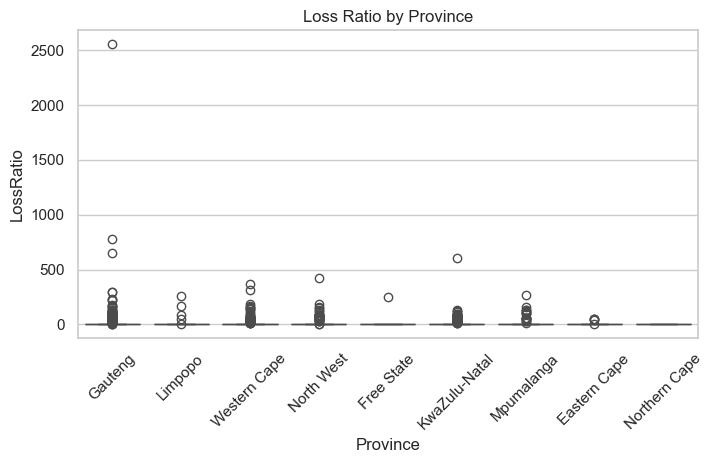

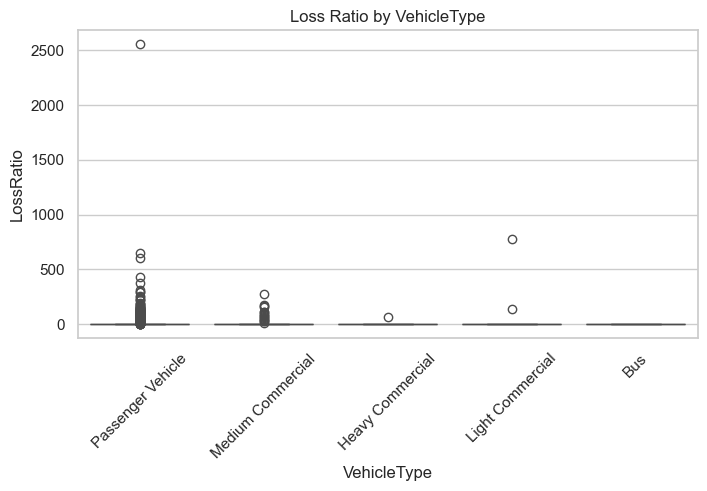

In [12]:
# ---------------------------------------------
# Step 9: Bivariate analysis
# ---------------------------------------------
# Scatter plot: TotalPremium vs TotalClaims
if 'TotalPremium' in data.columns and 'TotalClaims' in data.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='TotalPremium', y='TotalClaims', data=data, alpha=0.3)
    plt.title('TotalPremium vs TotalClaims')
    plt.show()

# Correlation heatmap for numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(data[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# LossRatio by Province
if 'Province' in data.columns and 'LossRatio' in data.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Province', y='LossRatio', data=data)
    plt.xticks(rotation=45)
    plt.title("Loss Ratio by Province")
    plt.show()

# LossRatio by VehicleType
if 'VehicleType' in data.columns and 'LossRatio' in data.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='VehicleType', y='LossRatio', data=data)
    plt.xticks(rotation=45)
    plt.title("Loss Ratio by VehicleType")
    plt.show()

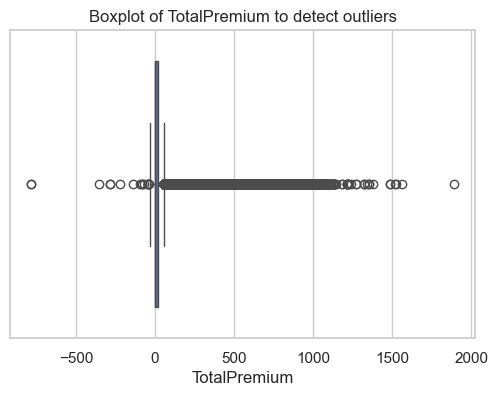

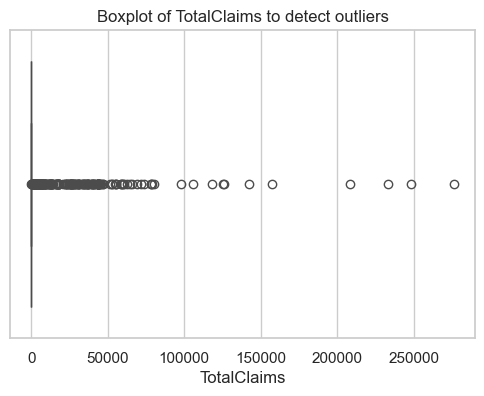

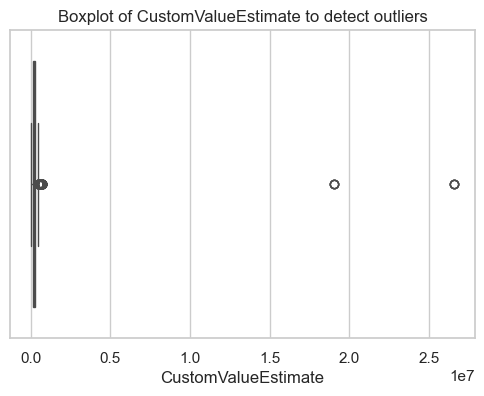

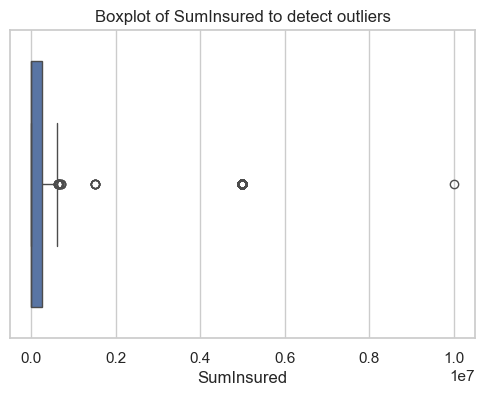

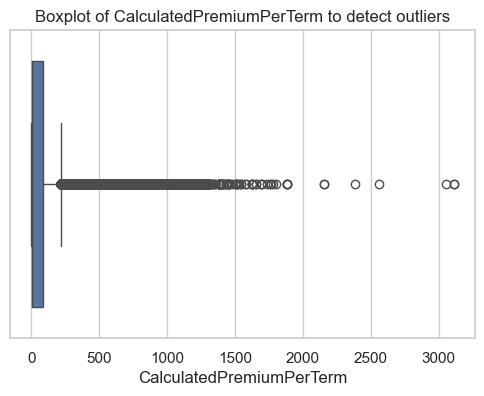

In [13]:
# ---------------------------------------------
# Step 10: Outlier detection
# ---------------------------------------------
for col in numeric_cols:
    if col in data.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col} to detect outliers')
        plt.show()
